<image src="img/Tesoro de denarios romanos de Torre de Juan Abad (Jaén).jpg" width="800" height="600">

Tesoro de denarios romanos de Torre de Juan Abad (Jaén)- MAN

# **MODELOS PARA LA CLASIFICACIÓN DE MONEDAS ANTIGUAS.**

## ÍNDICE
1. [IMPORTAR EL DATASET](#1-importar-el-dataset)  
2. [VISUALIZACIONES DEL DATAFRAME.](#2-visualizaciones-del-dataset)  
3. [ESTABLECER FEATURES Y TARGET DE LOS MODELOS.](#3-establecer-features-y-target-de-los-modelos)
4. [ESTABLECER LAS VARIABLES EN TRAIN Y TEST](#4-establecer-las-variables-en-train-y-test)
5. [MODELOS DE CLASIFICACIÓN DE MONEDAS ANTIGUAS](#5-modelos-de-clasificacion-de-monedas-antiguas)   
   5.1. [MODELO A: HistGradient Boosting Classifier](#51-modelo-a-histgradient-boosting-classifier)  
   5.2. [MODELO B: Random Forest Classifier](#52-modelo-b-random-forest-classifier)  
   5.3. [MODELO C: SVC](#53-modelo-c-svc)  
   5.4. [MODELO D: Redes neuronales](#54-modelo-d-redes-neuronales)  
   5.5. [MODELO E: Redes Convolucionales](#55-modelo-e-redes-convolucionales)  
   5.6. [MODELO F: PCA-Random Forest.](#56-modelo-f-pca-random-forest)  


## 1. IMPORTAR EL DATASET.

In [ ]:
'''Importar librerias.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''Importar DataFrame.'''

df_A = pd.read_csv('../data/processed/df_limpio.csv')
df_A

,Unique ID,broadperiod,period,thickness,diameter,weight,axis,Primary material,Manufacture method,URL,...,objectCertainty,rulerName,mintName,denominationName,tribeName,categoryTerm,moneyerName,Primary Material_n,Manufacture Method_n,axis_known
0,LEIC-0434D6,MEDIEVAL,2,0.25,15.0,0.64,-1.0,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Certain,Edward IV of England (first reign),NaN,Halfpenny,NaN,English coin Late Medieval 1377 - 1489,NaN,8,4,0
1,WAW-DC5BDB,MEDIEVAL,2,0.60,15.8,0.56,-1.0,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,NaN,Edward I - III,NaN,Halfpenny,NaN,English coin Edwardian type 1279 - 1377,NaN,8,4,0
2,IOW-095911,MEDIEVAL,2,0.60,14.3,0.45,-1.0,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Certain,Richard II of England,York,Penny,NaN,English coin Late Medieval 1377 - 1489,NaN,8,4,0
3,NLM-D74164,MEDIEVAL,2,0.60,16.8,0.36,-1.0,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Certain,Henry III of England,NaN,Cut halfpenny,NaN,English coin short and long cross period 1180 ...,NaN,8,4,0
4,NLM-D87812,MEDIEVAL,2,0.60,13.2,0.36,-1.0,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Certain,NaN,NaN,Farthing,NaN,NaN,NaN,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,SF8970,ROMAN,4,2.00,18.0,4.31,-1.0,Copper alloy,NaN,https://finds.org.uk/database/artefacts/record...,...,NaN,NaN,NaN,Uncertain,NaN,NaN,NaN,2,6,0
7302,WMID4942,ROMAN,4,1.70,18.2,3.99,-1.0,Copper alloy,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Certain,Severus Alexander,"Nicaea, Bithynia",Uncertain,NaN,NaN,NaN,2,4,0
7303,SF6727,ROMAN,4,1.70,17.0,3.03,-1.0,Silver,NaN,https://finds.org.uk/database/artefacts/record...,...,Certain,NaN,NaN,NaN,NaN,NaN,NaN,8,6,0
7304,LVPL1714,ROMAN,4,1.70,18.0,6.32,-1.0,Copper alloy,NaN,https://finds.org.uk/database/artefacts/record...,...,Certain,Philip II,NaN,NaN,NaN,NaN,NaN,2,6,0


## 2. VISUALIZACIONES DEL DATAFRAME.

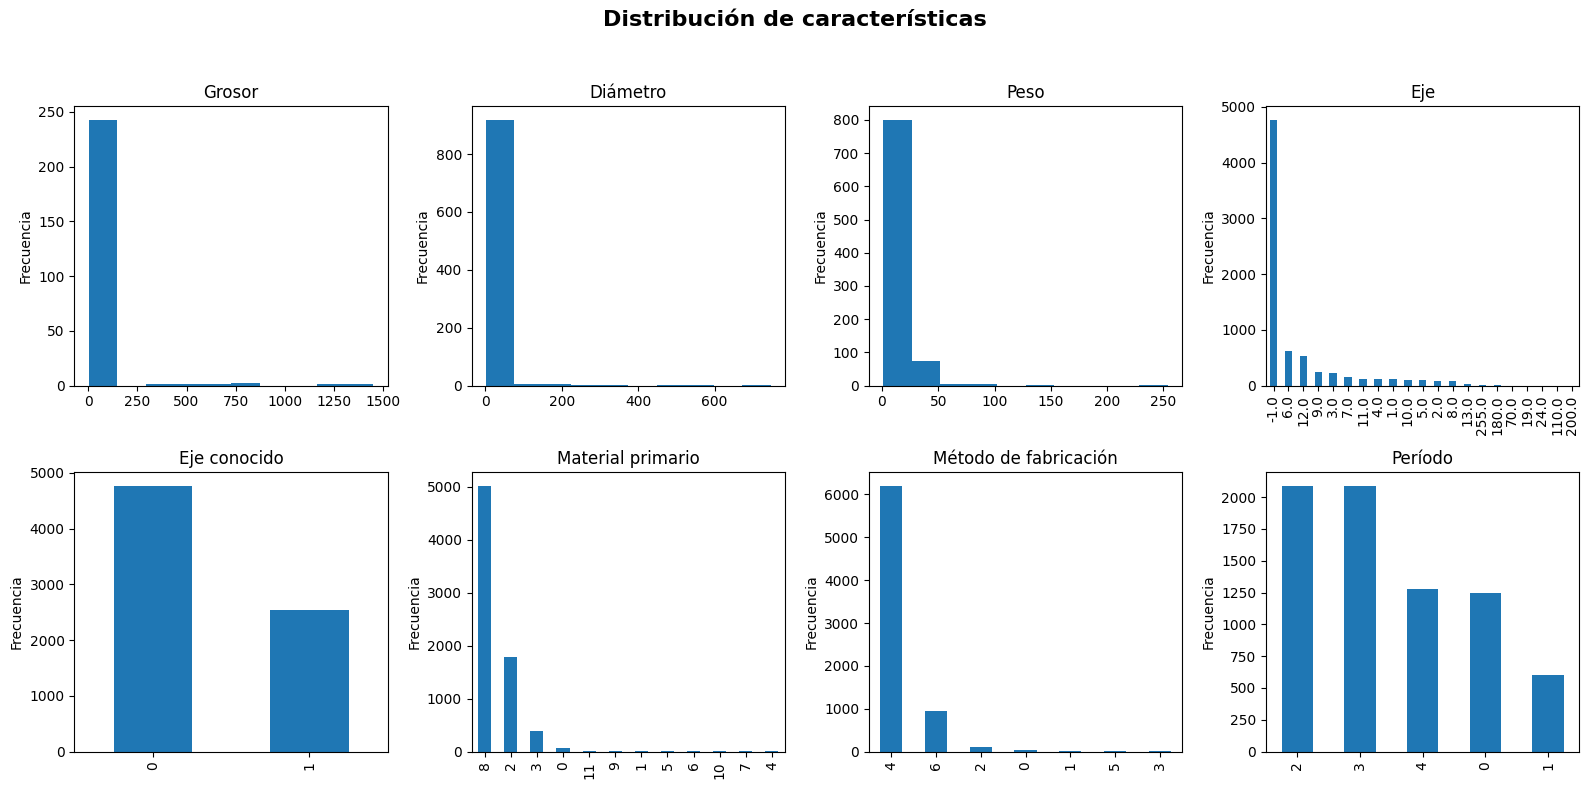

In [4]:
# Lista de características a graficar
features_bar = ['axis', 'axis_known', 'Primary Material_n', 'Manufacture Method_n', 'period']
features_line = ['thickness', 'diameter', 'weight']

# Crear la figura y los subplots en un grid de 2x4
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Distribución de características", fontsize=16, fontweight='bold')

# Diccionario de traducciones para los títulos
titles = {
    'thickness': 'Grosor',
    'diameter': 'Diámetro',
    'weight': 'Peso',
    'axis': 'Eje',
    'axis_known': 'Eje conocido',
    'Primary Material_n': 'Material primario',
    'Manufacture Method_n': 'Método de fabricación',
    'period': 'Período'
}

# Graficar las variables continuas con líneas
for ax, feature in zip(axes.flatten()[:3], features_line):
    df_A[feature].value_counts().sort_index().plot(kind="hist", ax=ax)
    ax.set_title(titles[feature])
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Graficar las variables categóricas con barras
for ax, feature in zip(axes.flatten()[3:], features_bar):
    df_A[feature].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(titles[feature])
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])



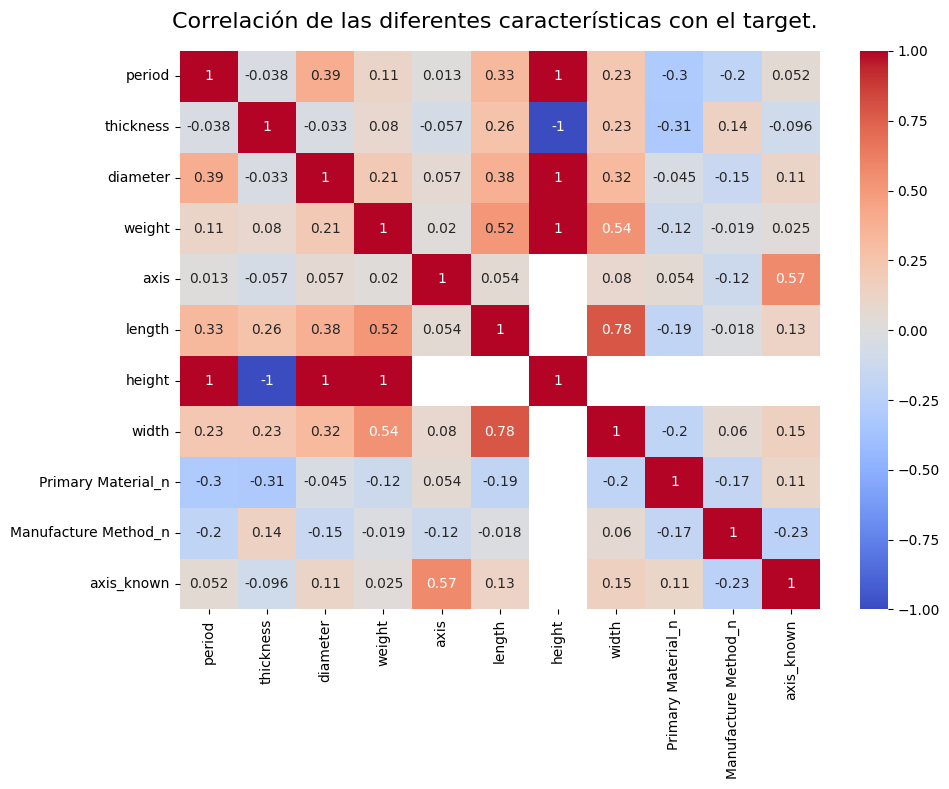

In [5]:
'''Visualizar las correlaciones de las features con el target.'''

# Crear en mapa de calor.
plt.figure(figsize=(10,8))
sns.heatmap(df_A.corr(numeric_only=True), annot=True, cmap='coolwarm');

# Título del gráfico
plt.suptitle('Correlación de las diferentes características con el target.', fontsize=16);

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

## 3. ESTABLECER FEATURES Y TARGET DE LOS MODELOS.

In [6]:
# Declarar las features y target.

X_A = df_A[['thickness', 'diameter', 'weight', 'axis', 'axis_known', 'Primary Material_n', 'Manufacture Method_n']]
y_A = df_A['period']

## 4. ESTABLECER LAS VARIABLES EN TRAIN Y TEST.

In [7]:
# Establecer las variables en train y en test.

XA_train, XA_test, yA_train, yA_test = train_test_split(X_A, y_A, test_size=0.2, random_state=7)

## 5. MODELOS DE CLASIFICACIÓN DE MONEDAS ANTIGUAS.

### 5.1. MODELO A: HistGradient Boosting Classifier.

In [8]:
print(XA_train.shape)
print(XA_test.shape)
print(yA_train.shape)
print(yA_test.shape)

(5844, 7)
(1462, 7)
(5844,)
(1462,)


In [9]:
# Crear y entrenar el modelo. 

model_A = HistGradientBoostingClassifier()
model_A.fit(XA_train, yA_train)

HistGradientBoostingClassifier()

In [10]:
# Hacer predicciones
predicciones_A = model_A.predict(XA_test)

In [11]:
# Calcular las probabilidades de las predicciones.

predicciones_proba_A = model_A.predict_proba(XA_test)
predicciones_proba_A

array([[9.36025946e-05, 5.62118177e-08, 2.52415796e-04, 9.99653502e-01,
        4.23549000e-07],
       [2.86172315e-06, 4.25689205e-08, 4.48724863e-07, 5.95522342e-05,
        9.99937095e-01],
       [1.44008746e-06, 9.99995875e-01, 7.07117957e-08, 2.10192272e-06,
        5.11938665e-07],
       ...,
       [1.14620670e-04, 1.10617932e-05, 9.99819030e-01, 3.79929414e-05,
        1.72943348e-05],
       [1.40284006e-04, 2.16887023e-07, 9.99704929e-01, 1.51967578e-04,
        2.60251081e-06],
       [2.13544792e-07, 9.99997992e-01, 7.09306318e-09, 5.17816612e-07,
        1.26935934e-06]])

In [12]:
'''Realizar el cálculo de diferentes métricas.'''

# Accuracy score.

aciertos_A = accuracy_score(yA_test, predicciones_A)

errores_A = 1 - aciertos_A
print("Acierto:", round(aciertos_A*100, 2), "%")
print("Error:", round(errores_A*100, 2), "%")

Acierto: 91.04 %
Error: 8.96 %


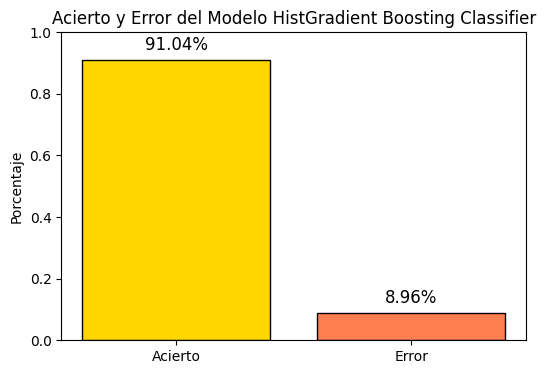

In [13]:
'''Visualización del accuracy.'''

# Valores de acierto y error
acierto = aciertos_A
error = errores_A

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo HistGradient Boosting Classifier')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

In [ ]:
# Varias métricas.

from sklearn.metrics import classification_report

class_report_A =classification_report(yA_test, predicciones_A)


In [15]:
# Crear un pipeline para escalar los datos y hacer una validación cruzada.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

clf_A = HistGradientBoostingClassifier()

pipeline_A = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf_A)
])

# Realizar validación cruzada
scores_A = cross_val_score(pipeline_A, X_A, y_A, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Exactitud en cada fold: {scores_A}')
print(f'Exactitud promedio: {scores_A.mean()}')

Exactitud en cada fold: [0.88919289 0.90417522 0.89801506 0.88911704 0.88364134]
Exactitud promedio: 0.8928283103509299


In [16]:
# Crear un pipeline para hacer una validación cruzada sin escalar los datos.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf_A1 = HistGradientBoostingClassifier()

pipeline_A1 = Pipeline([    
    ('classifier', clf_A1)
])

# Realizar validación cruzada
scores_A1 = cross_val_score(pipeline_A1, X_A, y_A, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Exactitud en cada fold: {scores_A1}')
print(f'Exactitud promedio: {scores_A1.mean()}')

Exactitud en cada fold: [0.88919289 0.90417522 0.89801506 0.88911704 0.88364134]
Exactitud promedio: 0.8928283103509299


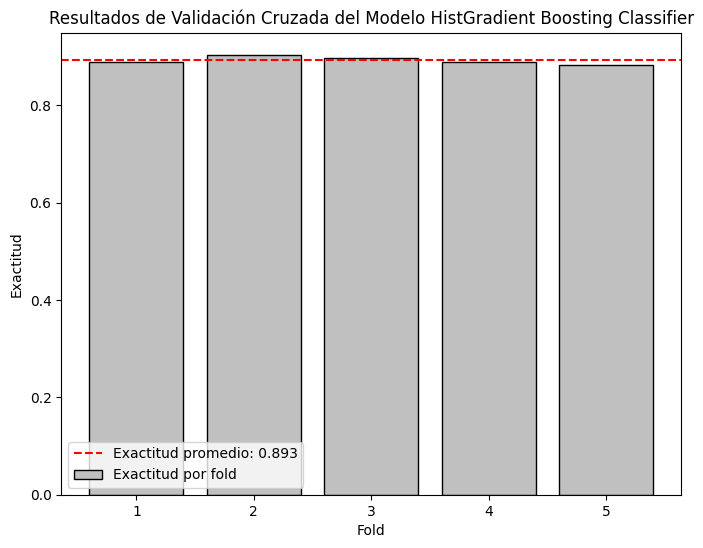

In [17]:
'''Visualización de la validación cruzada.'''

# Datos de validación cruzada
scores_A1 = np.array(scores_A1)

# Graficar las exactitudes en cada fold
plt.figure(figsize=(8, 6));
plt.bar(range(1, len(scores_A1) + 1), scores_A1, color='silver', edgecolor='black', label='Exactitud por fold');

# Mostrar la exactitud promedio como una línea
plt.axhline(y=scores_A1.mean(), color='red', linestyle='--', label=f'Exactitud promedio: {scores_A1.mean():.3f}');

# Títulos y etiquetas
plt.title('Resultados de Validación Cruzada del Modelo HistGradient Boosting Classifier');
plt.xlabel('Fold');
plt.ylabel('Exactitud');
plt.xticks(range(1, len(scores_A1) + 1));  
plt.legend();

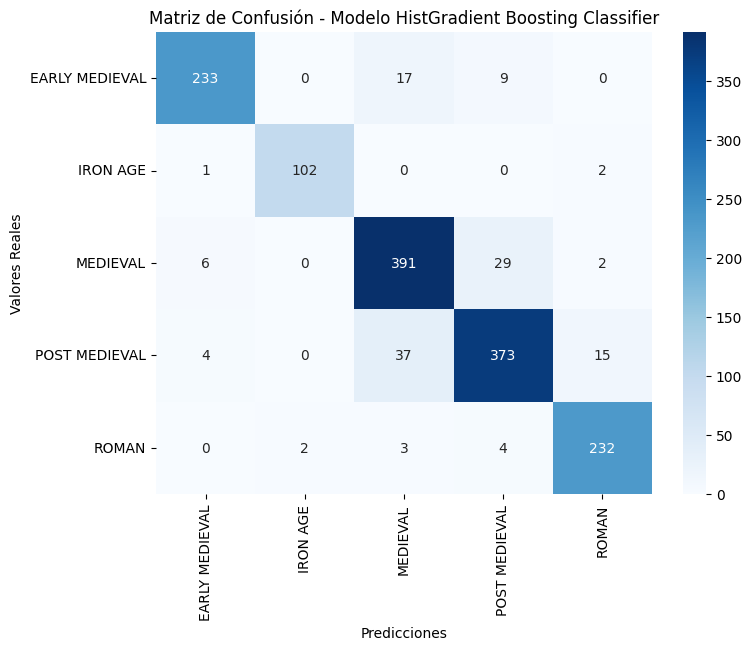

In [18]:
# Confusion_matrix y su visualización.

cm_A = confusion_matrix(yA_test, predicciones_A)

# Obtener las clases reales ordenadas
clases_reales_A = np.sort(np.unique(yA_test))  # Asegura el orden correcto

# Etiquetas personalizadas para las épocas
etiquetas_epocas_A = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL','ROMAN']  

# Gráfico.
plt.figure(figsize=(8, 6));
sns.heatmap(cm_A, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels= etiquetas_epocas_A, yticklabels=etiquetas_epocas_A); 
plt.title('Matriz de Confusión - Modelo HistGradient Boosting Classifier');
plt.xticks(rotation = 90);
plt.yticks(rotation = 0);
plt.xlabel('Predicciones');
plt.ylabel('Valores Reales');

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid_A = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [10, 20, 30],
    'l2_regularization': [0, 1, 10]
}

gs_model_A = GridSearchCV(estimator=model_A, param_grid=param_grid_A, cv=3, scoring='accuracy', verbose=3)
gs_model_A.fit(XA_train, yA_train)

print(gs_model_A.best_estimator_)
print(gs_model_A.best_score_)
print(gs_model_A.best_params_)


"\n\nparam_grid_A = {\n    'learning_rate': [0.01, 0.05, 0.1, 0.2],\n    'max_iter': [100, 200, 300],\n    'max_leaf_nodes': [15, 31, 63],\n    'min_samples_leaf': [10, 20, 30],\n    'l2_regularization': [0, 1, 10]\n}\n\ngs_model_A = GridSearchCV(estimator=model_A, param_grid=param_grid_A, cv=3, scoring='accuracy', verbose=3)\ngs_model_A.fit(XA_train, yA_train)\n\nprint(gs_model_A.best_estimator_)\nprint(gs_model_A.best_score_)\nprint(gs_model_A.best_params_)\n\n"

In [20]:
'''Entrenar el modelo con los parámetros del GridSearch.'''

param_grid_model_A = {
    'learning_rate': [0.05],
    'max_iter': [100],
    'max_leaf_nodes': [15],
    'min_samples_leaf': [30],
    'l2_regularization': [0]
}

grid_model_A = GridSearchCV(estimator=model_A, param_grid=param_grid_model_A, cv=3, scoring='accuracy', verbose=3)
grid_model_A.fit(XA_train, yA_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END l2_regularization=0, learning_rate=0.05, max_iter=100, max_leaf_nodes=15, min_samples_leaf=30;, score=0.916 total time=   0.4s
[CV 2/3] END l2_regularization=0, learning_rate=0.05, max_iter=100, max_leaf_nodes=15, min_samples_leaf=30;, score=0.907 total time=   0.4s
[CV 3/3] END l2_regularization=0, learning_rate=0.05, max_iter=100, max_leaf_nodes=15, min_samples_leaf=30;, score=0.908 total time=   0.4s


GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': [0], 'learning_rate': [0.05],
                         'max_iter': [100], 'max_leaf_nodes': [15],
                         'min_samples_leaf': [30]},
             scoring='accuracy', verbose=3)

In [21]:
'''Hacer predicciones.'''

predicciones_grid_A = grid_model_A.predict(XA_test)

In [22]:
'''Calcular las probabilidades de las predicciones.'''

predicciones_proba_grid_A = grid_model_A.predict_proba(XA_test)
predicciones_proba_grid_A

array([[2.35342352e-03, 3.90277581e-05, 2.93376971e-03, 9.94527124e-01,
        1.46654744e-04],
       [8.11789294e-04, 1.07163736e-04, 1.98713455e-04, 4.55679476e-03,
        9.94325539e-01],
       [5.63799055e-04, 9.98655958e-01, 2.08311370e-04, 2.90966943e-04,
        2.80964811e-04],
       ...,
       [2.60301091e-03, 9.10026830e-04, 9.90428902e-01, 5.18919886e-03,
        8.68861509e-04],
       [3.67579391e-03, 9.56268291e-05, 9.92703661e-01, 3.14332920e-03,
        3.81588985e-04],
       [8.97670554e-05, 9.99434306e-01, 4.24613661e-05, 1.23814409e-04,
        3.09651570e-04]])

In [23]:
'''Realizar el cálculo de diferentes métricas.'''

# Accuracy score.

aciertos_grid_A = accuracy_score(yA_test, predicciones_grid_A)

errores_grid_A = 1 - aciertos_A
print("Acierto:", round(aciertos_grid_A*100, 2), "%")
print("Error:", round(errores_grid_A*100, 2), "%")

Acierto: 91.59 %
Error: 8.96 %


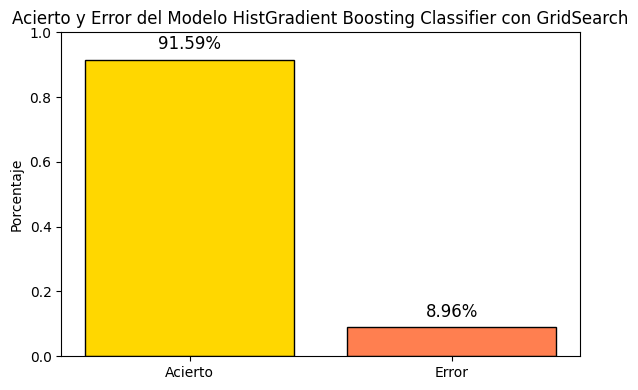

In [24]:
'''Visualización del accuracy.'''

# Valores de acierto y error
acierto = aciertos_grid_A
error = errores_grid_A

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo HistGradient Boosting Classifier con GridSearch')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

In [25]:
# Varias métricas.

print(classification_report(yA_test, predicciones_grid_A))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       259
           1       0.99      0.98      0.99       105
           2       0.88      0.92      0.90       428
           3       0.90      0.88      0.89       429
           4       0.93      0.98      0.95       241

    accuracy                           0.92      1462
   macro avg       0.93      0.93      0.93      1462
weighted avg       0.92      0.92      0.92      1462



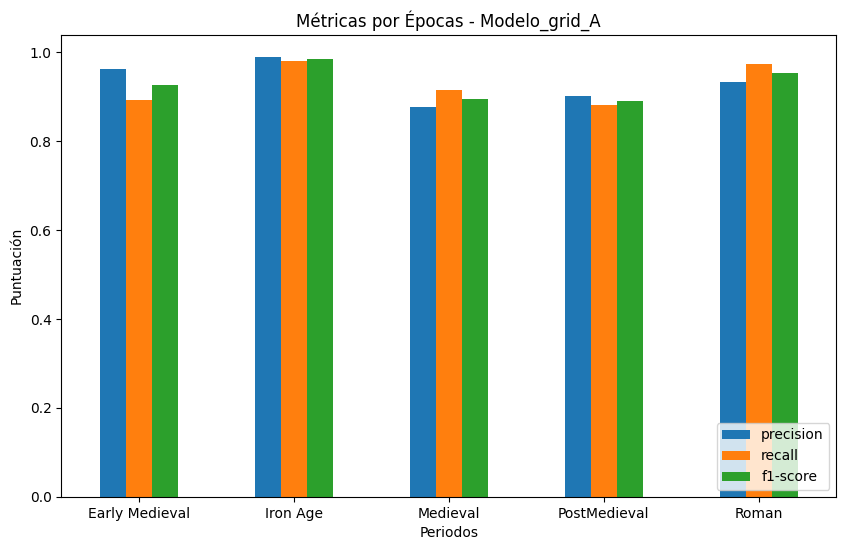

In [26]:
'''Visualización del reporte de clasificación.'''

# Obtener el reporte como diccionario
class_report_dict = classification_report(yA_test, predicciones_grid_A, output_dict=True)

# Convertir a DataFrame
class_report_df = pd.DataFrame(class_report_dict).T

# Filtrar solo las filas de las clases (excluyendo accuracy, macro avg y weighted avg)
class_report_graf = class_report_df.iloc[:-3, :]

# Crear el gráfico de barras
ax = class_report_graf[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
# Cambiar los nombres en el eje X
epocas = ["Early Medieval", "Iron Age", "Medieval", "PostMedieval", "Roman"]
ax.set_xticklabels(epocas)
plt.title('Métricas por Épocas - Modelo_grid_A');
plt.ylabel('Puntuación');
plt.xlabel('Periodos');
plt.xticks(rotation=0);
plt.legend(loc='lower right');

In [ ]:
# Realizar validación cruzada
scores_grid_A = cross_val_score(grid_model_A, X_A, y_A, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Exactitud en cada fold: {scores_grid_A}')
print(f'Exactitud promedio: {scores_grid_A.mean()}')

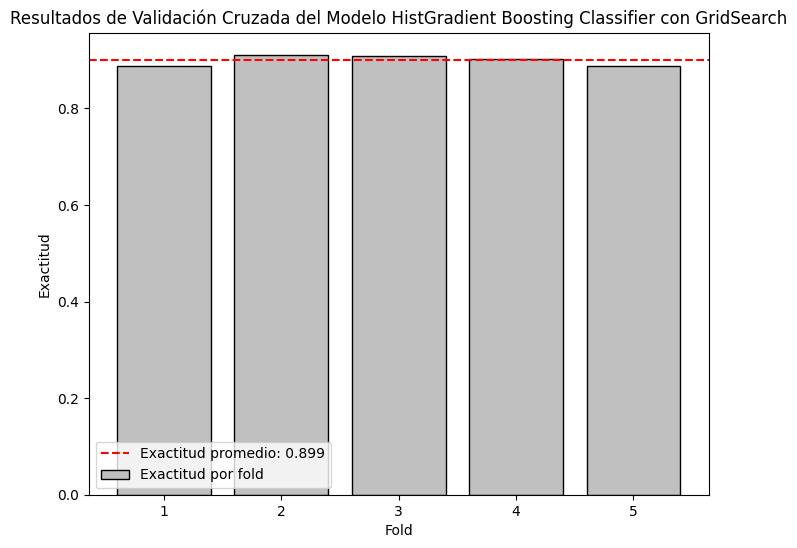

In [28]:
'''Visualización de la validación cruzada.'''

# Datos de validación cruzada
scores_grid_A = np.array(scores_grid_A)

# Graficar las exactitudes en cada fold
plt.figure(figsize=(8, 6));
plt.bar(range(1, len(scores_grid_A) + 1), scores_grid_A, color='silver', edgecolor='black', label='Exactitud por fold');

# Mostrar la exactitud promedio como una línea
plt.axhline(y=scores_grid_A.mean(), color='red', linestyle='--', label=f'Exactitud promedio: {scores_grid_A.mean():.3f}');

# Títulos y etiquetas
plt.title('Resultados de Validación Cruzada del Modelo HistGradient Boosting Classifier con GridSearch');
plt.xlabel('Fold');
plt.ylabel('Exactitud');
plt.xticks(range(1, len(scores_grid_A) + 1));  
plt.legend();

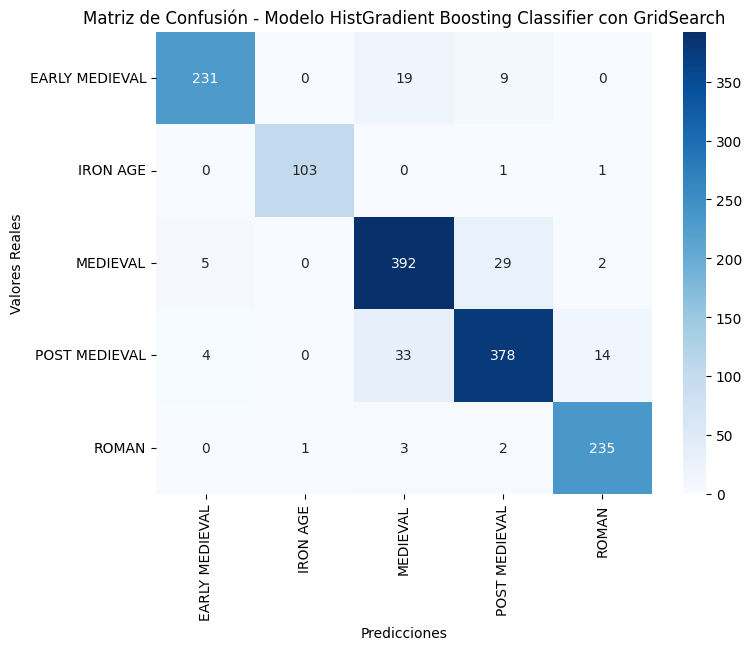

In [29]:
# Confusion_matrix y su visualización.

cm_grid_A = confusion_matrix(yA_test, predicciones_grid_A)

# Obtener las clases reales ordenadas
clases_reales_grid_A = np.sort(np.unique(yA_test)) 

# Etiquetas personalizadas para las épocas
etiquetas_epocas_grid_A = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL','ROMAN']  

# Gráfico.
plt.figure(figsize=(8, 6));
sns.heatmap(cm_grid_A, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels= etiquetas_epocas_grid_A, yticklabels=etiquetas_epocas_grid_A); 
plt.title('Matriz de Confusión - Modelo HistGradient Boosting Classifier con GridSearch');
plt.xticks(rotation = 90);
plt.yticks(rotation = 0);
plt.xlabel('Predicciones');
plt.ylabel('Valores Reales');

In [31]:
'''Guardar el Modelo A.'''

# Lo nombro 'ModeloA_HistGradientBoostingClassifier'.

with open('../Models/ModeloA_HistGradientBoostingClassifier.pkl', 'wb') as f:
    pickle.dump(model_A, f)

In [32]:
'''Guardar el Modelo Grid A.'''

# Lo nombro 'Modelo_grid_A_HistGradientBoostingClassifier'.

with open('../Models/Modelo_grid_A_HistGradientBoostingClassifier.pkl', 'wb') as f:
    pickle.dump(grid_model_A, f)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5.2. MODELO B: Random Forest Classifier.

In [33]:
'''Establecer el modelo B.'''

from sklearn.ensemble import RandomForestClassifier

model_B = RandomForestClassifier()

pipeline_B = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model_B)
])

In [ ]:
# Gridsearch del modelo B.

param_random_forest = {"classifier__n_estimators": [120],                      
                     "classifier__max_depth": [3,4,5,6,10,15,17],                       
                     "classifier__max_features": ["sqrt", 3, 4]                                                     
                     }

grid_model_B = GridSearchCV(pipeline_B, param_random_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_model_B.fit(XA_train, yA_train) 

In [35]:
# Hacer predicciones

predicciones_B = grid_model_B.predict(XA_test)

In [36]:
# Calcular las probabilidades de las predicciones.

predicciones_proba_B = grid_model_B.predict_proba(XA_test)
predicciones_proba_B

array([[0.00000000e+00, 0.00000000e+00, 4.90196078e-04, 9.99509804e-01,
        0.00000000e+00],
       [1.12185421e-03, 1.37553882e-03, 8.15485104e-05, 9.58158782e-03,
        9.87839471e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [5.16752425e-03, 8.33333333e-03, 9.84552742e-01, 1.94640069e-03,
        0.00000000e+00],
       [2.54531323e-03, 0.00000000e+00, 9.92600440e-01, 4.80248406e-03,
        5.17623793e-05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [37]:
'''Realizar el cálculo de diferentes métricas.'''

# Accuracy score.

aciertos_B = accuracy_score(yA_test, predicciones_B)

errores_B = 1 - aciertos_A
print("Acierto:", round(aciertos_B*100, 2), "%")
print("Error:", round(errores_B*100, 2), "%")

Acierto: 91.38 %
Error: 8.96 %


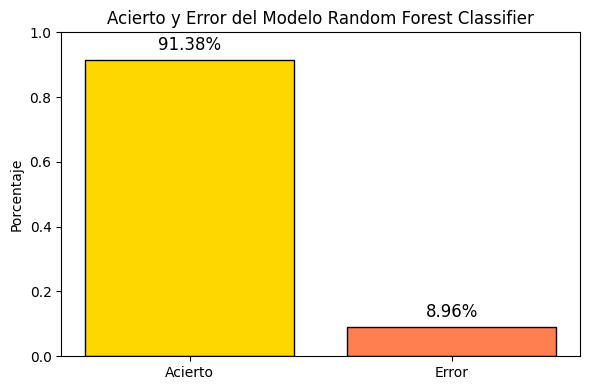

In [38]:
'''Visualización del accuracy.'''

# Valores de acierto y error
acierto = aciertos_B
error = errores_B

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo Random Forest Classifier')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

In [39]:
# Varias métricas.

print(classification_report(yA_test, predicciones_B))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       259
           1       0.98      0.97      0.98       105
           2       0.88      0.92      0.90       428
           3       0.91      0.88      0.89       429
           4       0.91      0.98      0.94       241

    accuracy                           0.91      1462
   macro avg       0.93      0.93      0.93      1462
weighted avg       0.92      0.91      0.91      1462



In [40]:
# Realizar validación cruzada
scores_B = cross_val_score(pipeline_B, X_A, y_A, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Exactitud en cada fold: {scores_B}')
print(f'Exactitud promedio: {scores_B.mean()}')

Exactitud en cada fold: [0.8871409  0.89322382 0.89322382 0.88706366 0.88090349]
Exactitud promedio: 0.8883111374534055


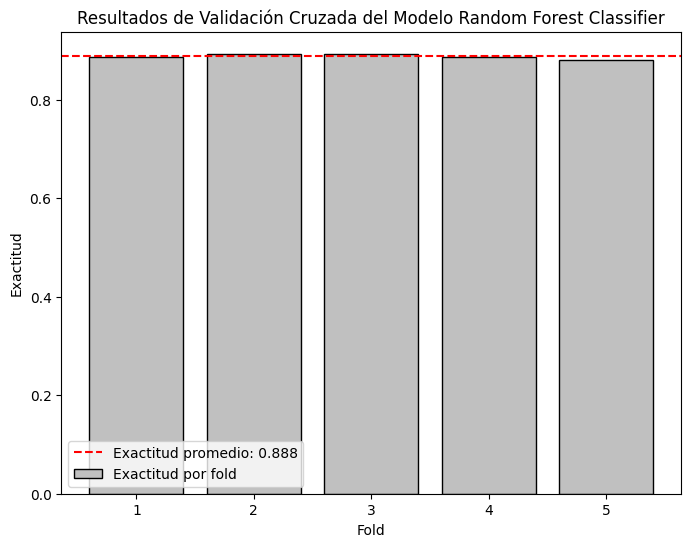

In [41]:
'''Visualización de la validación cruzada.'''

# Datos de validación cruzada
scores_B = np.array(scores_B)

# Graficar las exactitudes en cada fold
plt.figure(figsize=(8, 6));
plt.bar(range(1, len(scores_B) + 1), scores_B, color='silver', edgecolor='black', label='Exactitud por fold');

# Mostrar la exactitud promedio como una línea
plt.axhline(y=scores_B.mean(), color='red', linestyle='--', label=f'Exactitud promedio: {scores_B.mean():.3f}');

# Títulos y etiquetas
plt.title('Resultados de Validación Cruzada del Modelo Random Forest Classifier');
plt.xlabel('Fold');
plt.ylabel('Exactitud');
plt.xticks(range(1, len(scores_B) + 1));  
plt.legend();

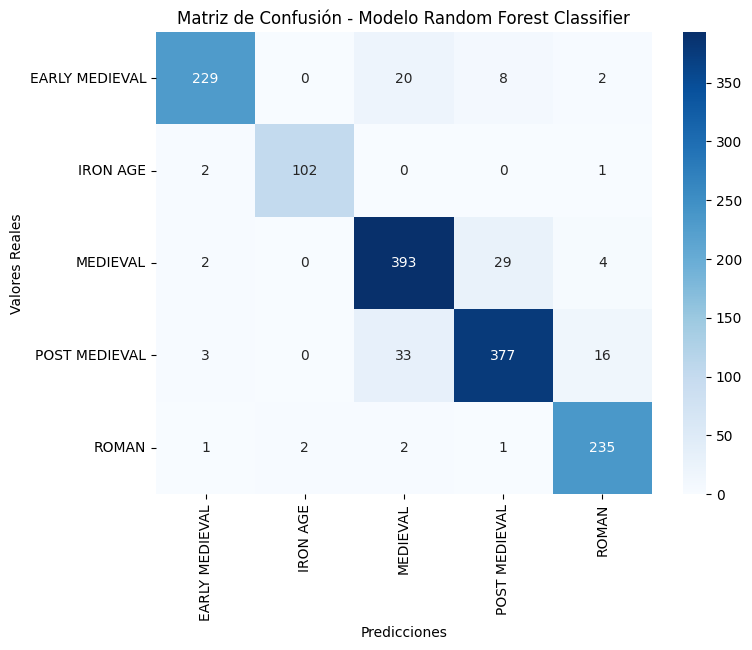

In [42]:
# Confusion_matrix y su visualización.

cm_B = confusion_matrix(yA_test, predicciones_B)

# Obtener las clases reales ordenadas
clases_reales_B = np.sort(np.unique(yA_test)) 

# Etiquetas personalizadas para las épocas
etiquetas_epocas_B = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL','ROMAN']  

# Gráfico.
plt.figure(figsize=(8, 6));
sns.heatmap(cm_B, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels= etiquetas_epocas_B, yticklabels=etiquetas_epocas_B); 
plt.title('Matriz de Confusión - Modelo Random Forest Classifier');
plt.xticks(rotation = 90);
plt.yticks(rotation = 0);
plt.xlabel('Predicciones');
plt.ylabel('Valores Reales');

In [43]:
'''Guardar el Modelo B.'''

# Lo nombro 'ModeloB_RandomForestClassifier'.

with open('../Models/ModeloB_RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(grid_model_B, f)

--------------------------------------------------------------------------------------------------------------------------------------------------

### 5.3. MODELO C: SVC.

In [44]:
'''Establecer el modelo C.'''

from sklearn.svm import SVC

model_C = SVC()

pipeline_C = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model_C)
])

In [45]:
# SVM.

param_svm = {"classifier__C": [0.01, 0.1, 1.0, 10.0], 
            "classifier__kernel": ["linear", "rbf"], 
            "classifier__degree": [2,3,4,5], 
            "classifier__gamma": ["scale", "auto"] 
           }

grid_model_C = GridSearchCV(pipeline_C, param_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_model_C.fit(XA_train, yA_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1.0, 10.0],
                         'classifier__degree': [2, 3, 4, 5],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [46]:
# Hacer predicciones

predicciones_C = grid_model_C.predict(XA_test)

In [47]:
'''Realizar el cálculo de diferentes métricas.'''

# Accuracy score.

aciertos_C = accuracy_score(yA_test, predicciones_C)

errores_C = 1 - aciertos_C
print("Acierto:", round(aciertos_C*100, 2), "%")
print("Error:", round(errores_C*100, 2), "%")

Acierto: 76.33 %
Error: 23.67 %


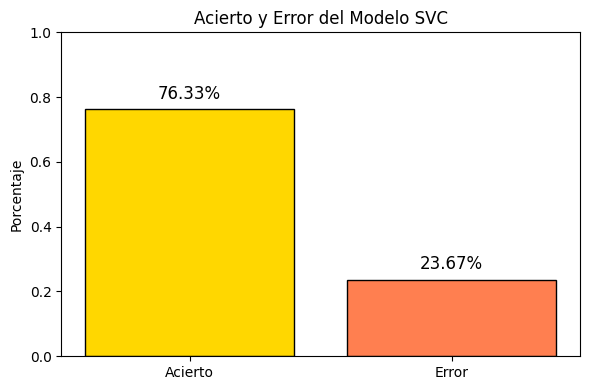

In [48]:
'''Visualización del accuracy.'''

# Valores de acierto y error
acierto = aciertos_C
error = errores_C

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo SVC')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

In [49]:
# Varias métricas.

print(classification_report(yA_test, predicciones_C))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       259
           1       0.97      0.92      0.95       105
           2       0.63      0.81      0.71       428
           3       0.75      0.57      0.65       429
           4       0.83      0.95      0.88       241

    accuracy                           0.76      1462
   macro avg       0.83      0.80      0.81      1462
weighted avg       0.78      0.76      0.76      1462



In [50]:
# Realizar validación cruzada
scores_C = cross_val_score(pipeline_C, X_A, y_A, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Exactitud en cada fold: {scores_C}')
print(f'Exactitud promedio: {scores_C.mean()}')

Exactitud en cada fold: [0.77428181 0.75770021 0.73990418 0.74195756 0.72073922]
Exactitud promedio: 0.7469165938664277


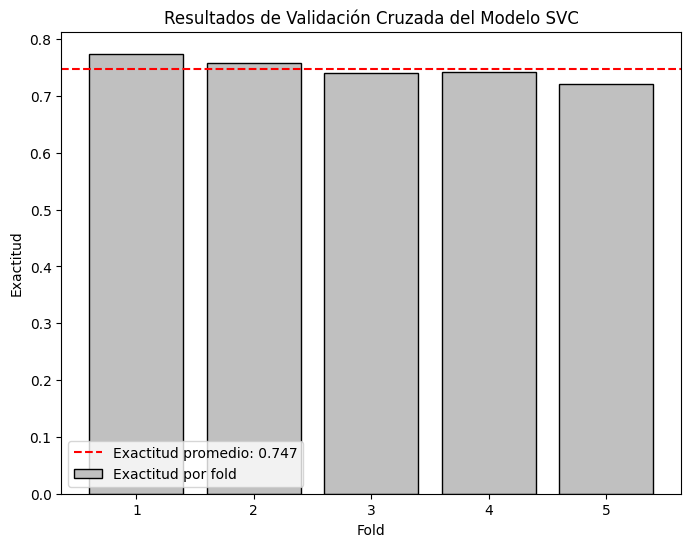

In [51]:
'''Visualización de la validación cruzada.'''

# Datos de validación cruzada
scores_C = np.array(scores_C)

# Graficar las exactitudes en cada fold
plt.figure(figsize=(8, 6));
plt.bar(range(1, len(scores_C) + 1), scores_C, color='silver', edgecolor='black', label='Exactitud por fold');

# Mostrar la exactitud promedio como una línea
plt.axhline(y=scores_C.mean(), color='red', linestyle='--', label=f'Exactitud promedio: {scores_C.mean():.3f}');

# Títulos y etiquetas
plt.title('Resultados de Validación Cruzada del Modelo SVC');
plt.xlabel('Fold');
plt.ylabel('Exactitud');
plt.xticks(range(1, len(scores_C) + 1));  
plt.legend();

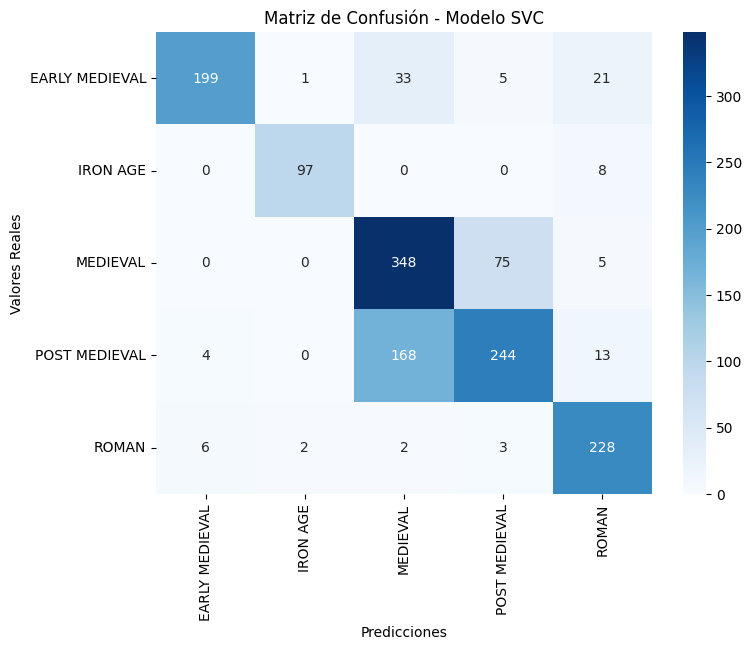

In [52]:
# Confusion_matrix y su visualización.

cm_C = confusion_matrix(yA_test, predicciones_C)

# Obtener las clases reales ordenadas
clases_reales_C = np.sort(np.unique(yA_test)) 

# Etiquetas personalizadas para las épocas
etiquetas_epocas_C = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL','ROMAN']  

# Gráfico.
plt.figure(figsize=(8, 6));
sns.heatmap(cm_C, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels= etiquetas_epocas_C, yticklabels=etiquetas_epocas_C); 
plt.title('Matriz de Confusión - Modelo SVC');
plt.xticks(rotation = 90);
plt.yticks(rotation = 0);
plt.xlabel('Predicciones');
plt.ylabel('Valores Reales');

In [53]:
'''Guardar el Modelo C.'''

# Lo nombro 'ModeloC_SVC'.

with open('../Models/ModeloC_SVC.pkl', 'wb') as f:
    pickle.dump(grid_model_C, f)

---------------------------------------------------------------------------------------------------------------------------

### 5.4. MODELO D: Redes neuronales.

In [54]:
'''Importar librerías.'''

from tensorflow import keras
from tensorflow.keras import layers

In [55]:
'''Separar en train. test y validación.'''

XA_train_full, XA_test, yA_train_full, yA_test = train_test_split(X_A, y_A, test_size=0.2, random_state=7)

XA_train, XA_valid, yA_train, yA_valid = train_test_split(XA_train_full,
                                                         yA_train_full)


# Escalar los datos.

scaler = StandardScaler()
XA_train = scaler.fit_transform(XA_train)
XA_valid = scaler.transform(XA_valid)
XA_test = scaler.transform(XA_test)

In [56]:
'''Crear el modelo D.'''

# Establecer un modelo con cuatro capas y la de salida son 5 por las 5 épocas en las
# que se divide la clasificación.

model_D = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(XA_train.shape[1],)),    
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(16, activation='relu'),    
    keras.layers.Dense(5, activation='softmax')  
])

# Realizar la compilacion del modelo.
model_D.compile(
    loss='sparse_categorical_crossentropy',     # Al ser una clasificación multiclase.
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005), 
    metrics=['accuracy']
)

# Callbacks.
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), # Interrumpe el entrenamiento cuando no ve progreso en la validación.
    #keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6) # Reduce la tasa de aprendizaje si no hay mejora.
]

# Entrenar el modelo.

history = model_D.fit(
    XA_train,
    yA_train,
    epochs=100,
    batch_size=64,  
    validation_data=(XA_valid, yA_valid),
    callbacks=callbacks
)

Epoch 1/100


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4659 - loss: 1.4525 - val_accuracy: 0.6242 - val_loss: 1.1979
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6260 - loss: 1.0584 - val_accuracy: 0.6345 - val_loss: 1.0410
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 0.9073 - val_accuracy: 0.6441 - val_loss: 0.9114
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.7393 - val_accuracy: 0.7625 - val_loss: 0.7897
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.6287 - val_accuracy: 0.7700 - val_loss: 0.7421
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.5899 - val_accuracy: 0.7584 - val_loss: 0.7101
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.5742 - val_accuracy: 0.7591 - val_loss: 0.6836
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5577 - val_accuracy: 0.7782 - val_loss: 0.6

In [57]:
model_D.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,948 (93.55 KB)

 Trainable params: 11,973 (46.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,975 (46.78 KB)

In [58]:
'''Hacer las predicciones.'''

predicciones_D = np.argmax(model_D.predict(XA_valid), axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [59]:
'''Realizar el cálculo de diferentes métricas.'''

# Accuracy score.

aciertos_D = accuracy_score(yA_valid, predicciones_D)

errores_D = 1 - aciertos_D
print("Acierto:", round(aciertos_D*100, 2), "%")
print("Error:", round(errores_D*100, 2), "%")

Acierto: 79.06 %
Error: 20.94 %


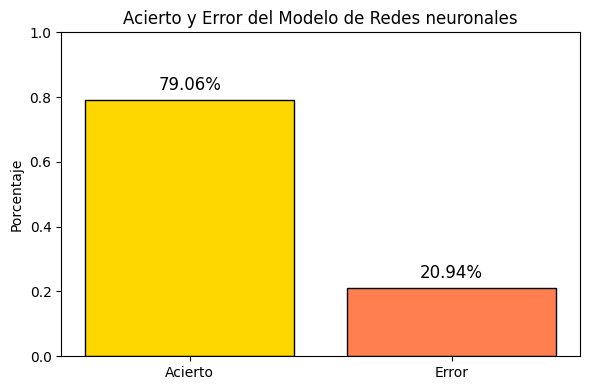

In [60]:
# Valores de acierto y error
acierto = aciertos_D
error = errores_D

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo de Redes neuronales')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

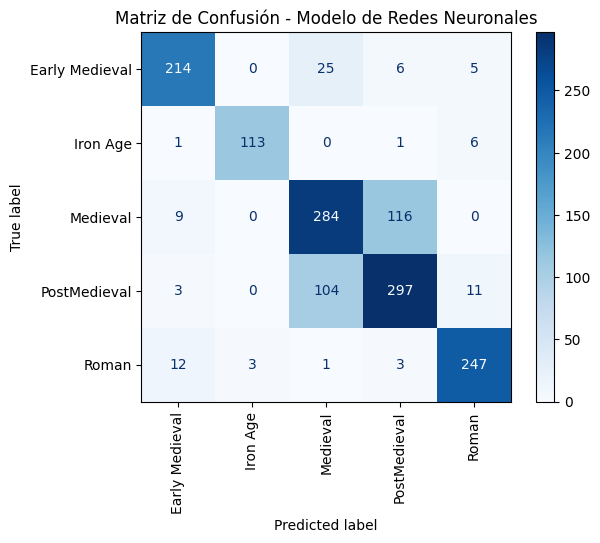

In [61]:
'''Calcular la Matriz de confusión.'''

from sklearn.metrics import ConfusionMatrixDisplay

# Definir los nombres de las épocas
epocas = ["Early Medieval", "Iron Age", "Medieval", "PostMedieval", "Roman"]

# Crear y mostrar la matriz de confusión con etiquetas personalizadas
ConfusionMatrixDisplay.from_predictions(yA_valid, predicciones_D, cmap='Blues', display_labels=epocas);
# Rotar las etiquetas del eje X
plt.xticks(rotation=90);
# Título
plt.title('Matriz de Confusión - Modelo de Redes Neuronales');

In [62]:
'''Realizar el reporte de clasifficación.'''

from sklearn.metrics import classification_report

print(classification_report(yA_valid, predicciones_D))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       250
           1       0.97      0.93      0.95       121
           2       0.69      0.69      0.69       409
           3       0.70      0.72      0.71       415
           4       0.92      0.93      0.92       266

    accuracy                           0.79      1461
   macro avg       0.84      0.83      0.83      1461
weighted avg       0.79      0.79      0.79      1461



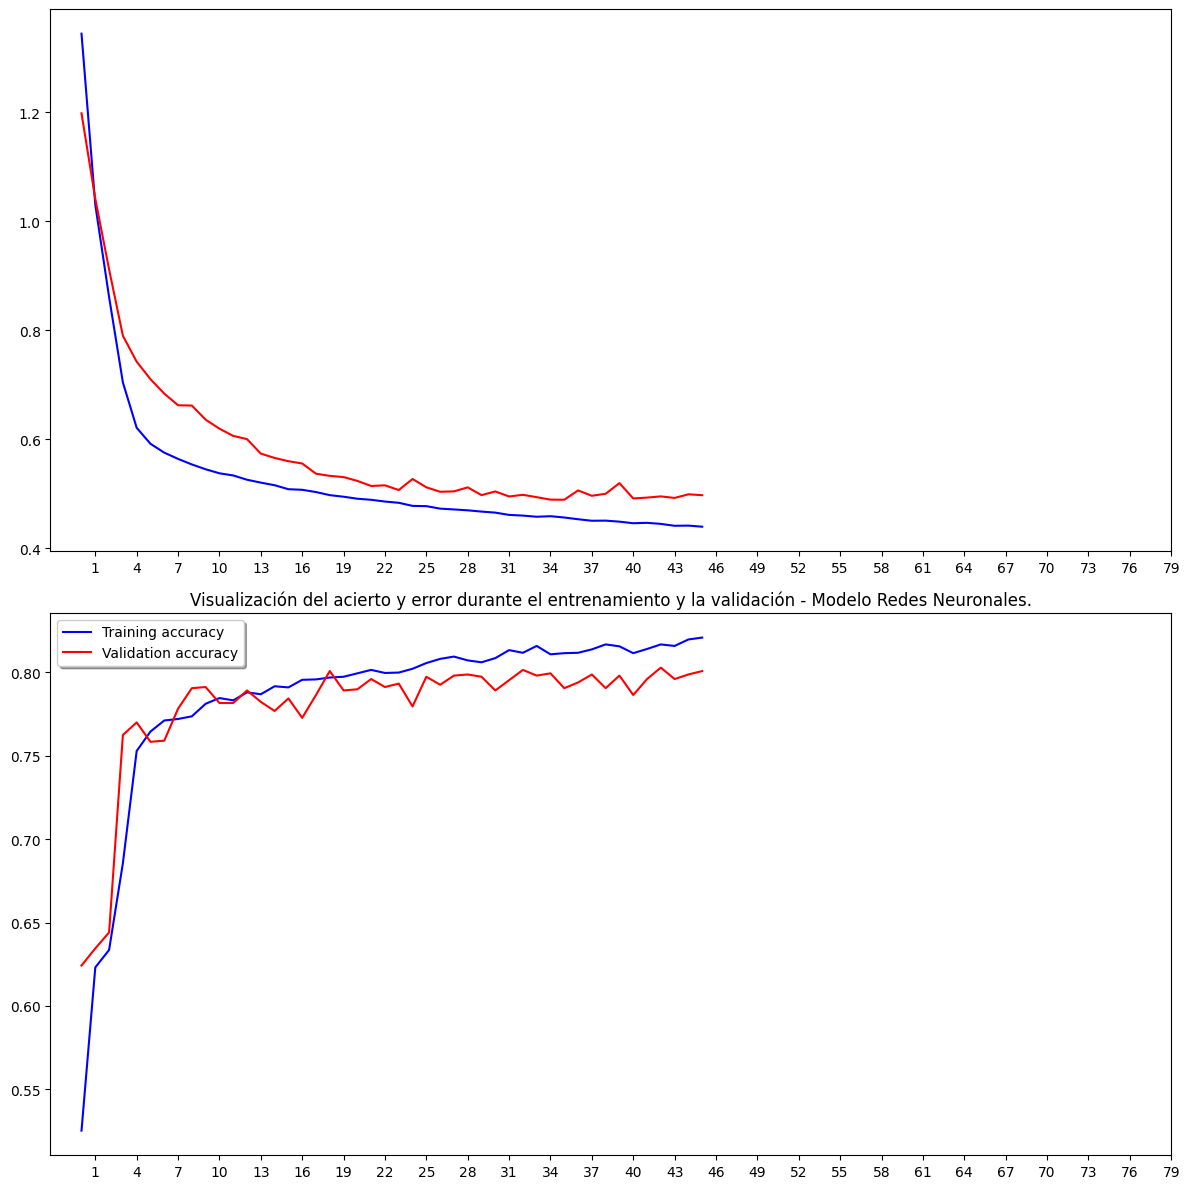

In [63]:
'''Visualización del entrenamiento y de la validación.'''

EPOCHS = 80

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS+1, 3)) 

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS+1, 3))

plt.title('Visualización del acierto y error durante el entrenamiento y la validación - Modelo Redes Neuronales.')
plt.legend(loc='upper left', shadow=True)
plt.tight_layout()

In [64]:
'''Guardar el Modelo D.'''

# Lo nombro 'ModeloD_Redes_neuronales'.

with open('../Models/ModeloD_Redes_neuronales.pkl', 'wb') as f:
    pickle.dump(model_D, f)

------------------------------------------------------------------------------------------------------------

### 5.5. MODELO E: Redes Convolucionales.

In [65]:
'''Importar librerías.'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import os

In [66]:
'''Definir las constantes.'''

IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 128
EPOCHS = 20

In [ ]:
'''Recorrer las diferentes imágenes y etiquetarlas.'''

IMAGENES = "../data/img/img_monedas_DL/"

# Lista de categorías y sus números correspondientes
category_mapping = {
    'Early Medieval': 0,
    'Iron Age': 1,
    'Medieval': 2,
    'Post medieval': 3,
    'Roman': 4
}

# Lista para almacenar los datos
data = []

# Iterar sobre las carpetas (categorías) en IMAGENES
for category in category_mapping:
    category_folder = os.path.join(IMAGENES, category)

    # Asegurarse de que la carpeta existe
    if os.path.isdir(category_folder):
        # Listar los archivos de imagen en la carpeta de la categoría
        image_files = [f for f in os.listdir(category_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Agregar los datos al DataFrame
        for image in image_files:
            data.append([image, category, category_mapping[category]])

# Crear un DataFrame con los datos
df = pd.DataFrame(data, columns=['Nombre', 'Periodo', 'Periodo_num'])
df

In [ ]:
'''Visualizar el conteo de las imagenes según la categoría.'''

df['Periodo'].value_counts().plot.bar();
plt.title('Distribución de las imágenes según la época - Modelo Redes Convolucionales.');

In [ ]:
'''Resize y convertir a blanco y negro cada imagen.'''

from skimage.io import imread
import cv2
from tqdm import tqdm

# Definir el path de las imágenes
IMAGENES = "../data/img/img_monedas_DL/"

# Lista de categorías y sus números correspondientes
category_mapping = {
    'Early Medieval': 0,
    'Iron Age': 1,
    'Medieval': 2,
    'Post medieval': 3,
    'Roman': 4
}

# Arrays para las imágenes y categorías
X = []
y = []

# Iterar sobre las carpetas (categorías)
for category in category_mapping:
    category_folder = os.path.join(IMAGENES, category)

    print(category)

    if os.path.isdir(category_folder):
        # Listar los archivos de imagen en la carpeta de la categoría
        image_files = [f for f in os.listdir(category_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # Procesar todas las imágenes en la carpeta
        for image_file in tqdm(image_files, desc=f'Procesando {category}'):
            # Construir la ruta completa de la imagen
            image_path = os.path.join(category_folder, image_file)
            
            # Leer la imagen en blanco y negro
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Verificar si la imagen se ha cargado correctamente
            if image is None:
                print(f"Error al cargar la imagen: {image_path}")
                continue
            
            # Redimensionar la imagen
            imagesmall = cv2.resize(image, (128, 128))
            
            # Normalizar los píxeles a [0, 1]
            imagesmall = imagesmall / 255.0
            
            # Expandir las dimensiones para tener el canal (1 canal para B/N)
            imagesmall = np.expand_dims(imagesmall, axis=-1)
            
            # Agregar a la lista de imágenes y categorías
            
            if category == 'Early Medieval':
                category_num = 0
            elif category == 'Iron Age':
                category_num = 1
            elif category == 'Medieval':
                category_num = 2
            elif category == 'Post medieval':
                category_num = 3
            elif category == 'Roman':
                category_num = 4
            
            X.append(imagesmall)
            y.append(category_num)
            

# Convertir a arrays de NumPy
X = np.array(X)
y = np.array(y)

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Early Medieval


Procesando Early Medieval: 100%|██████████| 1230/1230 [00:01<00:00, 1204.03it/s]


Iron Age


Procesando Iron Age: 100%|██████████| 600/600 [00:00<00:00, 1458.87it/s]


Medieval


Procesando Medieval: 100%|██████████| 2080/2080 [00:01<00:00, 1125.64it/s]


Post medieval


Procesando Post medieval: 100%|██████████| 2090/2090 [00:01<00:00, 1176.50it/s]


Roman


Procesando Roman: 100%|██████████| 1280/1280 [00:01<00:00, 1093.05it/s]


Shape de X: (7280, 128, 128, 1)
Shape de y: (7280,)


In [ ]:
'''Desordeno las imagenes ya que están agrupadas por época.'''

from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=7)

In [ ]:
'''Divido las imágenes en train y test.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
''''Guardar los arrays de las imágenes.'''

CARPETA = '../data/img/Arrays_imagenes'

np.savez(CARPETA + '/data.npz',
        X_train = X_train,
        y_train = y_train,
        X_test = X_test,
        y_test = y_test)

In [ ]:
'''Volver a cargarlos.'''

data = np.load(CARPETA + '/data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [ ]:
'''Crear el modelo.'''

from tensorflow import keras

layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
]

model_E = keras.Sequential(layers)

model_E.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
'''Ver el desarrollo del modelo.'''

model_E.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,949 (1.64 MB)

 Trainable params: 430,949 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''Crear un Early Stopping para entrenar el modelo.'''

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)

In [ ]:
'''Entrenar el modelo E.'''

history_E = model_E.fit(X_train,
         y_train,
         epochs = 20,
         batch_size = BATCH_SIZE,
         callbacks = [earlystop],
         validation_split = 0.2)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.3030 - loss: 1.5082 - val_accuracy: 0.4361 - val_loss: 1.3212
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - accuracy: 0.4301 - loss: 1.2945 - val_accuracy: 0.4815 - val_loss: 1.2077
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.5170 - loss: 1.1381 - val_accuracy: 0.5227 - val_loss: 1.1149
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - accuracy: 0.5474 - loss: 1.0548 - val_accuracy: 0.5519 - val_loss: 1.0426
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.5910 - loss: 0.9991 - val_accuracy: 0.5657 - val_loss: 1.0600
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 299ms/step - accuracy: 0.6133 - loss: 0.9588 - val_accuracy: 0.5734 - val_loss: 1.0674
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - accuracy: 0.6332 - loss: 0.9038 - val_accuracy: 0.6043 - val_loss: 0.9625
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 301ms/step - accuracy: 0.6557 - loss: 0.8668 - val_accu

In [ ]:
'''Evaluación.'''

results = model_E.evaluate(X_test, y_test)
results

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6421 - loss: 0.9840


[0.9785115122795105, 0.646291196346283]

In [ ]:
# Generar predicciones
y_pred = model_E.predict(X_test)
y_pred_class = y_pred.argmax(axis=-1)  

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


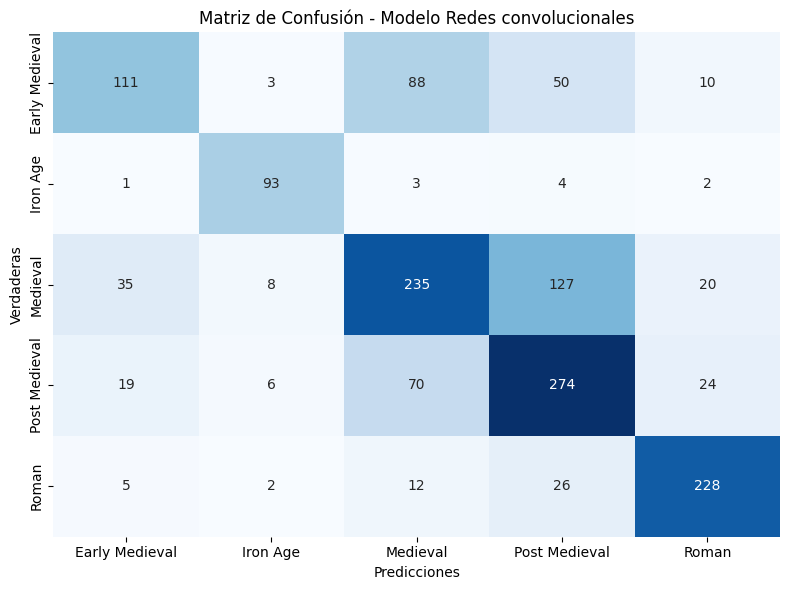

In [ ]:
'''Confusión matriz y su visualización.'''

# Calcular la matriz de confusión
cm_E = confusion_matrix(y_test, y_pred_class)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_E, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Early Medieval', 'Iron Age', 'Medieval', 'Post Medieval', 'Roman'], 
            yticklabels=['Early Medieval', 'Iron Age', 'Medieval', 'Post Medieval', 'Roman'])
plt.title('Matriz de Confusión - Modelo Redes convolucionales')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas')
plt.tight_layout()

In [ ]:
'''Comprobar modelo con una imagen externa.'''

from PIL import Image

# Cargar y procesar la imagen externa en escala de grises
img_path = '../data/img/img_monedas_predecir/Marco Aurelio.png'

# Cargar la imagen en escala de grises
img = Image.open(img_path).convert('L') 

# Redimensionar la imagen a las dimensiones requeridas por el modelo
img = img.resize((128, 128))  

# Convertir la imagen a un array de numpy
img_array = np.array(img)

# Normalizar la imagen si el modelo lo requiere
img_array = img_array / 255.0 

# Asegurarse de que la imagen tenga la forma correcta (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=-1)  

# Añadir una dimensión adicional para el batch_size
img_array = np.expand_dims(img_array, axis=0)  # Forma (1, 128, 128, 1)

In [ ]:
# Realizar la predicción.
pred = model_E.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
# Interpretar la predicción.

predicted_class = np.argmax(pred, axis=-1) 
print(f'La clase predicha es: {predicted_class[0]}')

La clase predicha es: 2


In [ ]:
'''Guardar el Modelo E.'''

# Lo nombro 'ModeloE_Redes_Convolucionales'.

model_E.save('ModeloE_Redes_Convolucionales.h5')

----------------------------------------------------------------------

### 5.6. MODELO F: PCA-Random Forest.

In [ ]:
'''Importar librerías'''

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
'''Establecer el modelo F.'''

# Definir el pipeline con estandarización, reducción de dimensionalidad y modelo de clasificación
pipeline_F = Pipeline([
    ('scaler', StandardScaler()),       
    ('pca', PCA(n_components=7)),        
    ('rf', RandomForestClassifier())  
])

In [ ]:
# Definir los hiperparámetros a buscar en GridSearchCV

param_grid_F = {
    'pca__n_components': [4, 5, 6, 7],         
    'rf__n_estimators': [100, 200],              
    'rf__max_depth': [5, 10, 20],             
    'rf__min_samples_split': [2, 5, 10]               
}

In [ ]:
# Configurar GridSearchCV

grid_search_F = GridSearchCV(
    estimator=pipeline_F,
    param_grid=param_grid_F,
    cv=5,                   
    scoring='accuracy',     
    n_jobs=-1               
)

In [ ]:
# Establecer las variables en train y en test.

XA_train, XA_test, yA_train, yA_test = train_test_split(X_A, y_A, test_size=0.2, random_state=7)

In [ ]:
'''Entrenar el modelo.'''

grid_search_F.fit(XA_train, yA_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=7)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [4, 5, 6, 7],
                         'rf__max_depth': [5, 10, 20],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search_F.best_params_)

Mejores parámetros: {'pca__n_components': 6, 'rf__max_depth': 20, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [ ]:
'''Predecir en el conjunto de prueba.'''

predicciones_F = grid_search_F.predict(XA_test)

In [ ]:
'''Evaluar el modelo.'''

aciertos_F = accuracy_score(yA_test, predicciones_F)

errores_F = 1 - aciertos_F
print("Acierto:", round(aciertos_F*100, 2), "%")
print("Error:", round(errores_F*100, 2), "%")

Acierto: 83.45 %
Error: 16.55 %


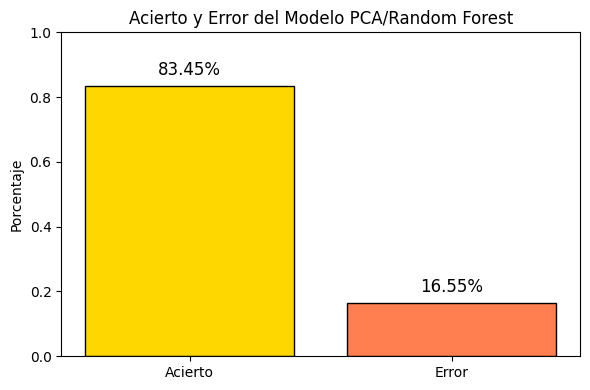

In [ ]:
'''Visualización del accuracy error.'''

# Valores de acierto y error
acierto = aciertos_F
error = errores_F

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Acierto', 'Error'], [acierto, error], color=['gold', 'coral'], edgecolor='black')

# Agregar título y etiquetas
plt.title('Acierto y Error del Modelo PCA/Random Forest')
plt.ylabel('Porcentaje')
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for i, v in enumerate([acierto, error]):
    plt.text(i, v + 0.02, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

In [ ]:
print("Reporte de clasificación:\n", classification_report(yA_test, predicciones_F))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       259
           1       0.98      0.95      0.97       105
           2       0.78      0.79      0.78       428
           3       0.77      0.80      0.78       429
           4       0.90      0.92      0.91       241

    accuracy                           0.83      1462
   macro avg       0.87      0.86      0.87      1462
weighted avg       0.84      0.83      0.84      1462



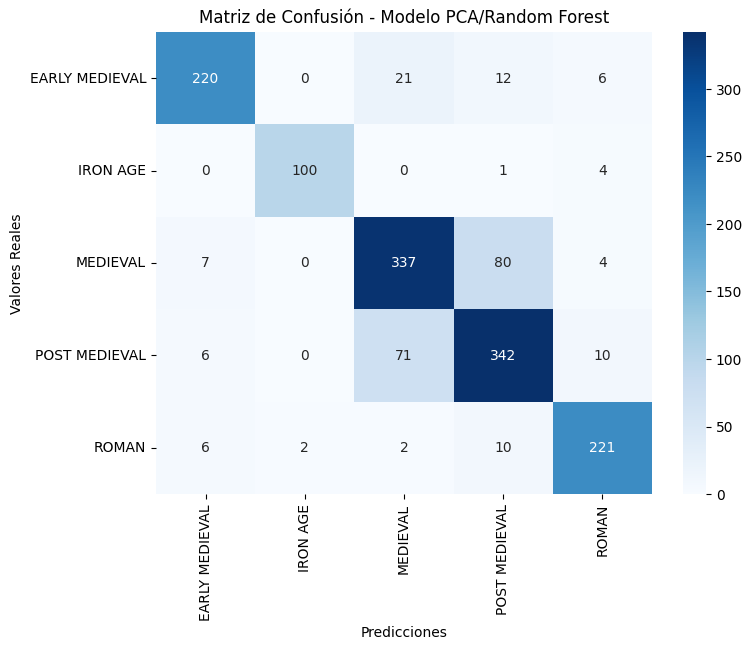

In [ ]:
# Confusion_matrix y su visualización.

cm_F = confusion_matrix(yA_test, predicciones_F)

# Obtener las clases reales ordenadas
clases_reales_F = np.sort(np.unique(yA_test)) 

# Etiquetas personalizadas para las épocas
etiquetas_epocas_F = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL','ROMAN']  

# Gráfico.
plt.figure(figsize=(8, 6));
sns.heatmap(cm_F, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels= etiquetas_epocas_F, yticklabels=etiquetas_epocas_F); 
plt.title('Matriz de Confusión - Modelo PCA/Random Forest');
plt.xticks(rotation = 90);
plt.yticks(rotation = 0);
plt.xlabel('Predicciones');
plt.ylabel('Valores Reales');

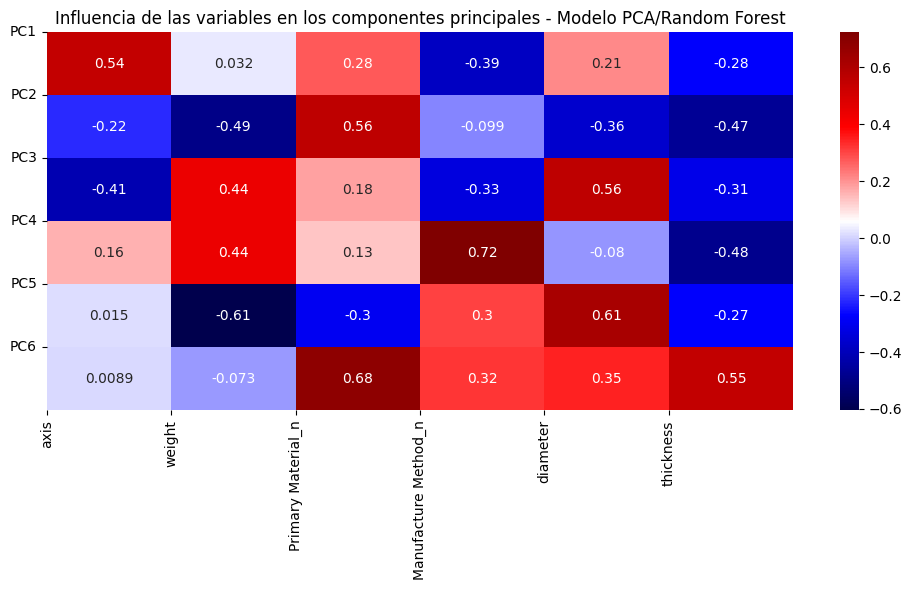

In [ ]:
'''Visualización de la influencia de las variables.'''

# Obtener el mejor modelo encontrado por GridSearchCV
modelo_F = grid_search_F.best_estimator_

# Acceder al PCA entrenado
mejor_pca_F = modelo_F.named_steps['pca']

# Visualizar la influencia de las variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = mejor_pca_F.components_

# Obtener los índices de las 6 variables más influyentes
influyentes = np.argsort(np.abs(componentes).sum(axis=0))[-mejor_pca_F.n_components_:]

# Etiquetas de las variables más influyentes
etiquetas = X_A.columns[influyentes]

# Heatmap con las etiquetas ajustadas
sns.heatmap(componentes[:, influyentes], cmap='seismic', annot=True)
plt.yticks(range(mejor_pca_F.n_components_), [f'PC{i+1}' for i in range(mejor_pca_F.n_components_)], rotation=0)
plt.xticks(range(len(etiquetas)), etiquetas, rotation=90)
plt.grid(False)
plt.title('Influencia de las variables en los componentes principales - Modelo PCA/Random Forest')

# Ajustar la visualización para evitar superposición de títulos y etiquetas
plt.tight_layout()

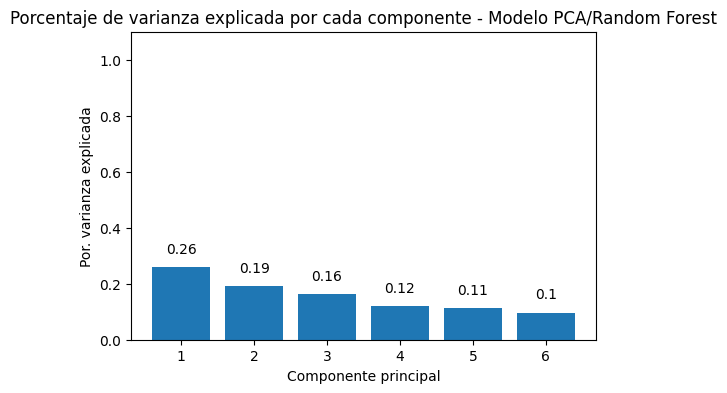

In [ ]:
'''Visualización del porcentaje de la varianza por cada componente.'''

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(mejor_pca_F.n_components_) + 1,
    height = mejor_pca_F.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_A.columns)) + 1, mejor_pca_F.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(mejor_pca_F.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente - Modelo PCA/Random Forest')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

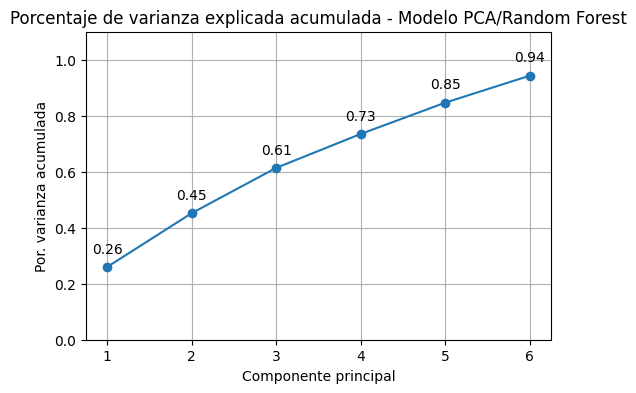

In [ ]:
'''Visualización del porcentaje de la varianza acumulada.'''

# Calcular la varianza acumulada
prop_varianza_acum = mejor_pca_F.explained_variance_ratio_.cumsum()

# Visualizar el porcentaje de varianza explicada acumulada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(mejor_pca_F.n_components_) + 1,
    prop_varianza_acum,
    marker='o'
)

# Añadir anotaciones de los porcentajes en el gráfico
for x, y in zip(np.arange(mejor_pca_F.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

# Personalización del gráfico
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(mejor_pca_F.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada - Modelo PCA/Random Forest')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.grid(True)

In [ ]:
'''Guardar el Modelo F.'''

# Lo nombro 'ModeloF_PCA_RF'.

with open('../Models/ModeloF_PCA_RF.pkl', 'wb') as f:
    pickle.dump(grid_search_F, f)